In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.columns = df.columns.str.lower().str.replace(' ', '_')


**Data preparation**

In [4]:
categorical =['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

df.head().T


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [5]:
# features and target
X = df.drop(columns=["default","loan","y"])
y = df["y"] #target

In [6]:
X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=[object])


In [7]:
X_num_names = list(X_num.columns)
X_cat_names = list(X_cat.columns)

In [36]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_train_full), len(df_test)

(36168, 9043)

In [37]:
df_train, df_val = train_test_split(df_train_full, test_size=len(df_test), random_state=1)
len(df_train), len(df_val), len(df_test)

y_train = (df_train.y == 'yes').astype(int).values
y_train_full = (df_train_full.y == 'yes').astype(int).values
y_val = (df_val.y == 'yes').astype(int).values
y_test = (df_test.y == 'yes').astype(int).values


del df_train['y']
del df_val['y']
del df_test['y']

In [10]:
len(df_train), len(df_val), len(df_test)

(27125, 9043, 9043)

In [11]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [13]:
X_test = dv.transform(df_val[categorical + numerical].to_dict(orient='records'))
y_pred = model.predict_proba(X_test)[:, 1]

In [14]:
y_decision = (y_pred >= 0.5)
(y_decision == y_val).mean()

np.float64(0.8973791883224593)

**Q. 1**

In [15]:
auc_scores = {}

In [16]:
import pandas as pd
from sklearn.metrics import roc_auc_score

In [17]:
for col in ['balance', 'day', 'duration', 'previous']:
    auc = roc_auc_score(y_train, df_train[col])
    auc_scores[col] = auc

In [18]:
for col, auc in auc_scores.items():
    print(f'{col}: AUC = {auc:.4f}')

balance: AUC = 0.5888
day: AUC = 0.4740
duration: AUC = 0.8147
previous: AUC = 0.5986


**Q. 2**

In [19]:
from sklearn.metrics import roc_auc_score
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
X_test = dv.transform(df_val.to_dict(orient='records'))
y_pred_auc = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_val, y_pred_auc).round(3)

np.float64(0.901)

**Q. 3**

0.00 0.121
0.01 0.219
0.02 0.354
0.03 0.467
0.04 0.569
0.05 0.649
0.06 0.708
0.07 0.745
0.08 0.776
0.09 0.796
0.10 0.814
0.11 0.825
0.12 0.837
0.13 0.847
0.14 0.853
0.15 0.859
0.16 0.864
0.17 0.868
0.18 0.874
0.19 0.878
0.20 0.880
0.21 0.884
0.22 0.887
0.23 0.888
0.24 0.890
0.25 0.892
0.26 0.893
0.27 0.893
0.28 0.894
0.29 0.895
0.30 0.895
0.31 0.896
0.32 0.896
0.33 0.897
0.34 0.897
0.35 0.897
0.36 0.897
0.37 0.898
0.38 0.899
0.39 0.899
0.40 0.900
0.41 0.900
0.42 0.900
0.43 0.899
0.44 0.899
0.45 0.899
0.46 0.899
0.47 0.899
0.48 0.898
0.49 0.898
0.50 0.897
0.51 0.898
0.52 0.897
0.53 0.897
0.54 0.897
0.55 0.897
0.56 0.897
0.57 0.897
0.58 0.896
0.59 0.896
0.60 0.896
0.61 0.895
0.62 0.895
0.63 0.895
0.64 0.894
0.65 0.894
0.66 0.894
0.67 0.893
0.68 0.893
0.69 0.892
0.70 0.892
0.71 0.891
0.72 0.892
0.73 0.892
0.74 0.891
0.75 0.890
0.76 0.890
0.77 0.890
0.78 0.889
0.79 0.888
0.80 0.888
0.81 0.887
0.82 0.887
0.83 0.887
0.84 0.886
0.85 0.886
0.86 0.885
0.87 0.885
0.88 0.884
0.89 0.884
0.90 0.883

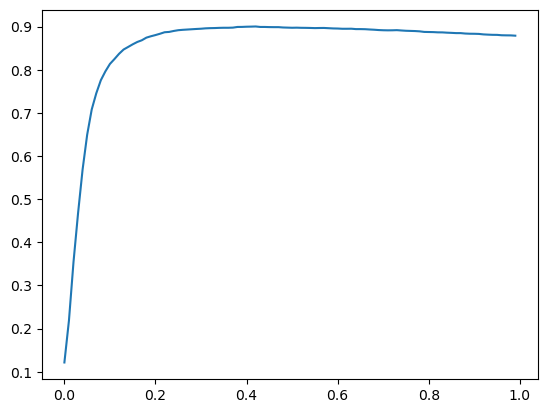

In [20]:
thresholds = np.linspace(0.0, 0.99, 100)
scores = []
precisions = []
recalls = []

for t in thresholds:
    y_decision = (y_pred >= t)
    score = (y_val == y_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)
plt.plot(thresholds,scores)

In [21]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)

In [22]:
diff = np.abs(precision[:-1] - recall[:-1])

In [23]:
min_diff_index = np.argmin(diff)

In [24]:
intersection_threshold = thresholds[min_diff_index]


In [25]:
intersection_threshold

np.float64(0.2631214827324377)

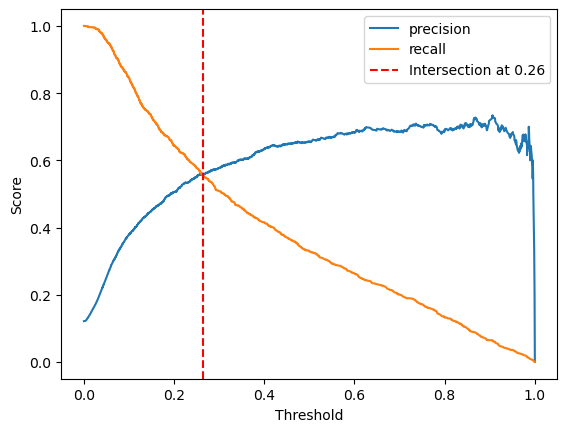

In [26]:
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label=f'Intersection at {intersection_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

**Q. 4**

In [27]:
thresholds = np.linspace(0.0, 0.99, 100)
f1_scores = []
for t in thresholds:
    tp = (y_pred >= t) & (y_val == 1)
    fp = (y_pred >= t) & (y_val == 0)
    tn = (y_pred < t) & (y_val == 0)
    fn = (y_pred < t) & (y_val == 1)
    
    p = tp.sum() / (tp.sum() + fp.sum())
    r = tp.sum() / (tp.sum() + fn.sum())
    f1 = 2*p*r/(p+r)
    f1_scores.append((t, f1))

f1_df = pd.DataFrame(f1_scores, columns=['threshold', 'f-score'])
f1_df.sort_values('f-score', ascending=False).head()

,threshold,f-score
22,0.22,0.571309
21,0.21,0.568619
19,0.19,0.567969
20,0.20,0.566733
23,0.23,0.566054


**Q. 5**

In [41]:
C = 1.0
n_splits = 5

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_dict_full = df_train_full[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(train_dict_full)


k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in k_fold.split(X_train_full):
    X_train_train = X_train_full[train_idx]
    y_train_train = y_train_full[train_idx]
    
    X_train_val = X_train_full[val_idx]
    y_train_val = y_train_full[val_idx]
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train_train, y_train_train)
    
    y_pred = model.predict_proba(X_train_val)[:, 1]
    auc = roc_auc_score(y_train_val, y_pred)
    scores.append(auc)

np.std(scores)

np.float64(0.005621314202146361)

**Q. 6**

In [45]:
C = 1.0
n_splits = 5

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_dict_full = df_train_full[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(train_dict_full)


k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for c in [0.000001, 0.001, 1]:
    for train_idx, val_idx in k_fold.split(X_train_full):
        X_train_train = X_train_full[train_idx]
        y_train_train = y_train_full[train_idx]

        X_train_val = X_train_full[val_idx]
        y_train_val = y_train_full[val_idx]

        model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
        model.fit(X_train_train, y_train_train)

        y_pred = model.predict_proba(X_train_val)[:, 1]
        auc = roc_auc_score(y_train_val, y_pred)
        scores.append((c, auc))
    print(np.std(scores).round(3))
# scores
    




0.351
0.394
0.418
